In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('tae.data',names=['speaker', 'instructor', 'course', 'semester', 'class_size', 'attribute'])
df.head()

,speaker,instructor,course,semester,class_size,attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [3]:
df.isna().sum()

speaker       0
instructor    0
course        0
semester      0
class_size    0
attribute     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   speaker     151 non-null    int64
 1   instructor  151 non-null    int64
 2   course      151 non-null    int64
 3   semester    151 non-null    int64
 4   class_size  151 non-null    int64
 5   attribute   151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [5]:
df.describe()

,speaker,instructor,course,semester,class_size,attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


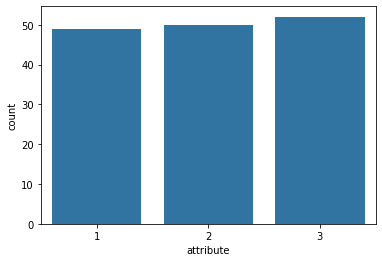

In [6]:
df_performance = df.groupby('attribute')[['speaker']].count().reset_index().rename(columns={'speaker': 'count'})
sns.barplot(x='attribute', y='count', data=df_performance, color='tab:blue')
plt.show()

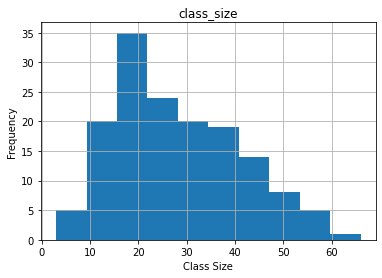

In [7]:
numerical_columns = ['class_size']

for column in numerical_columns:
    df[column].hist()
    plt.title(column)
    plt.xlabel('Class Size')
    plt.ylabel('Frequency')
    plt.show()

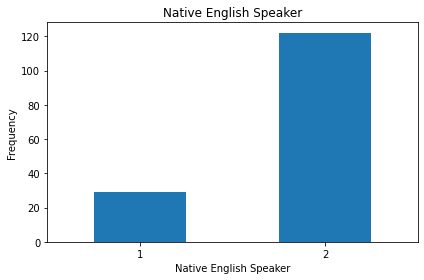

In [8]:
instructor_counts = df['speaker'].value_counts().sort_index()

instructor_counts.plot(kind='bar')
plt.title('Native English Speaker')
plt.xlabel('Native English Speaker')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

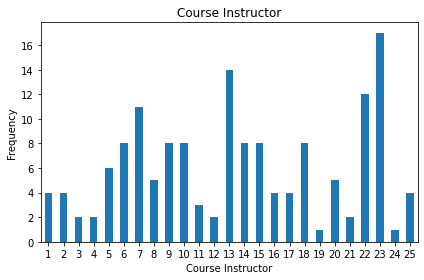

In [9]:
instructor_counts = df['instructor'].value_counts().sort_index()

instructor_counts.plot(kind='bar')
plt.title('Course Instructor')
plt.xlabel('Course Instructor')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

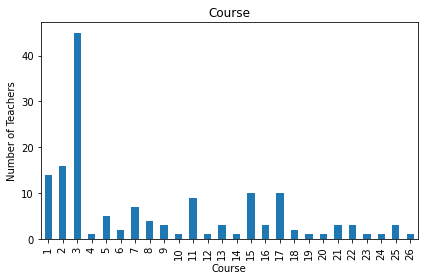

In [10]:
course_counts = df['course'].value_counts().sort_index()
course_counts.plot(kind='bar')
plt.title('Course')
plt.xlabel('Course')
plt.ylabel('Number of Teachers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

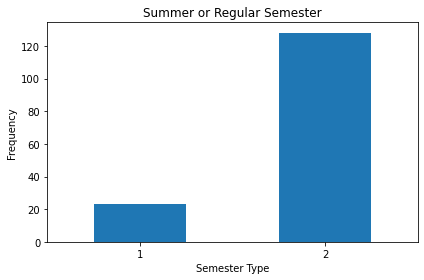

In [11]:
semester_counts = df['semester'].value_counts().sort_index()
semester_counts.plot(kind='bar')
plt.title('Summer or Regular Semester')
plt.xlabel('Semester Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

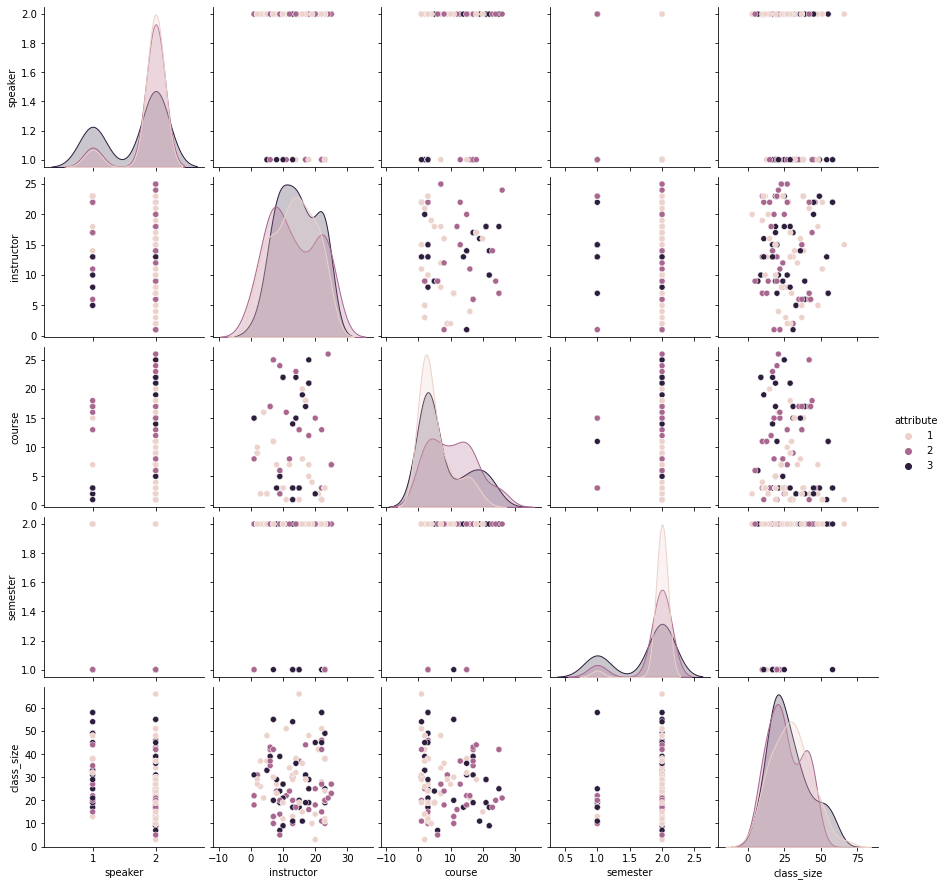

In [12]:
sns.pairplot(df,hue='attribute')

### Task 3 – Data Modelling

In [13]:
x=df.drop('attribute',axis=1)
x.sample(5)

,speaker,instructor,course,semester,class_size
46,2,10,3,2,27
17,2,22,3,2,46
57,2,13,3,1,10
62,2,1,15,1,22
45,2,9,5,2,19


In [14]:
y=df['attribute']
y.sample(5)

26     2
115    1
83     3
17     2
107    1
Name: attribute, dtype: int64

#### Split dataset to training and testing

In [15]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Suite1: 50% for training and 50% for testing


In [16]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.5)

#### Support Vector Machine(SVM)

In [17]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [18]:
pred=model.predict(x_test)
pred

array([1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 2, 2, 2], dtype=int64)

In [19]:
y_test

11     3
91     3
2      3
36     1
125    3
      ..
47     3
132    2
43     3
96     2
124    3
Name: attribute, Length: 76, dtype: int64

##### Classification accuracy

In [20]:
accuracy_score(y_test,pred)

0.42105263157894735

In [21]:
confusion_matrix(y_test,pred)

array([[11, 14,  0],
       [ 2, 21,  0],
       [12, 16,  0]], dtype=int64)

Text(33.0, 0.5, 'True labels')

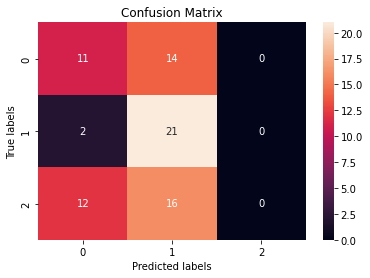

In [22]:
s=sns.heatmap(confusion_matrix(y_test,pred), annot = True)
s.set_title('Confusion Matrix')
s.set_xlabel('Predicted labels', fontsize=10)
s.set_ylabel('True labels', fontsize=10)

In [23]:
report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
report

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,1,2,3,accuracy,macro avg,weighted avg
precision,0.44,0.411765,0.0,0.421053,0.283922,0.269350
recall,0.44,0.913043,0.0,0.421053,0.451014,0.421053
f1-score,0.44,0.567568,0.0,0.421053,0.335856,0.316501
support,25.00,23.000000,28.0,0.421053,76.000000,76.000000


#### Decision tree

In [24]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
pred=model.predict(x_test)
pred

array([1, 2, 3, 2, 3, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2, 1, 2, 3, 2, 2, 3, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 2, 3, 3, 1, 3, 3, 1, 3, 2, 3, 1,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2, 3, 2, 2,
       1, 1, 3, 2, 2, 3, 1, 3, 2, 1], dtype=int64)

In [26]:
y_test

11     3
91     3
2      3
36     1
125    3
      ..
47     3
132    2
43     3
96     2
124    3
Name: attribute, Length: 76, dtype: int64

##### Classification accuracy

In [27]:
accuracy_score(y_test,pred)

0.6052631578947368

In [28]:
confusion_matrix(y_test,pred)

array([[17,  6,  2],
       [ 3, 14,  6],
       [ 5,  8, 15]], dtype=int64)

Text(33.0, 0.5, 'True labels')

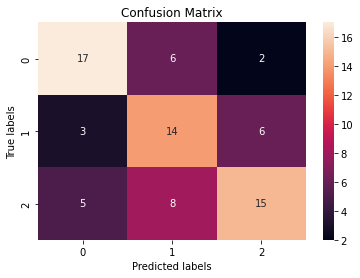

In [29]:
s=sns.heatmap(confusion_matrix(y_test,pred), annot = True)
s.set_title('Confusion Matrix')
s.set_xlabel('Predicted labels', fontsize=10)
s.set_ylabel('True labels', fontsize=10)

In [30]:
report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
report

,1,2,3,accuracy,macro avg,weighted avg
precision,0.68,0.500000,0.652174,0.605263,0.610725,0.615275
recall,0.68,0.608696,0.535714,0.605263,0.608137,0.605263
f1-score,0.68,0.549020,0.588235,0.605263,0.605752,0.606553
support,25.00,23.000000,28.000000,0.605263,76.000000,76.000000


## Suite2: 60% for training and 40% for testing

In [31]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.4)

#### Support Vector Machine(SVM)

In [32]:
model=SVC()
model.fit(x_train,y_train)

SVC()

In [33]:
pred=model.predict(x_test)
pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 1], dtype=int64)

In [34]:
y_test

80     3
18     2
113    1
119    1
69     1
      ..
34     1
46     3
75     1
76     1
126    3
Name: attribute, Length: 61, dtype: int64

##### Classification accuracy

In [35]:
accuracy_score(y_test,pred)

0.3114754098360656

In [36]:
confusion_matrix(y_test,pred)

array([[ 3,  0, 16],
       [ 0,  0, 25],
       [ 1,  0, 16]], dtype=int64)

Text(33.0, 0.5, 'True labels')

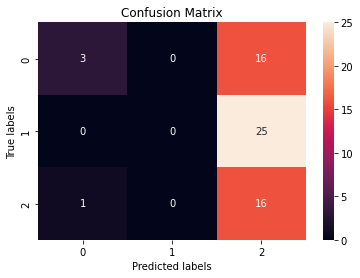

In [37]:
s=sns.heatmap(confusion_matrix(y_test,pred), annot = True)
s.set_title('Confusion Matrix')
s.set_xlabel('Predicted labels', fontsize=10)
s.set_ylabel('True labels', fontsize=10)

In [38]:
report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
report

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,1,2,3,accuracy,macro avg,weighted avg
precision,0.750000,0.0,0.280702,0.311475,0.343567,0.311835
recall,0.157895,0.0,0.941176,0.311475,0.366357,0.311475
f1-score,0.260870,0.0,0.432432,0.311475,0.231101,0.201768
support,19.000000,25.0,17.000000,0.311475,61.000000,61.000000


#### Decision tree

In [39]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
pred=model.predict(x_test)
pred

array([1, 2, 1, 1, 1, 2, 3, 1, 3, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 3, 1, 1,
       1, 3, 2, 3, 1, 3, 3, 3, 1, 3, 2, 2, 2, 3, 2, 1, 2, 3, 2, 1, 1, 2,
       1, 2, 2, 3, 3, 2, 3, 2, 1, 2, 1, 3, 1, 3, 1, 1, 3], dtype=int64)

In [41]:
y_test

80     3
18     2
113    1
119    1
69     1
      ..
34     1
46     3
75     1
76     1
126    3
Name: attribute, Length: 61, dtype: int64

In [42]:
accuracy_score(y_test,pred)

0.6229508196721312

In [43]:
confusion_matrix(y_test,pred)

array([[14,  2,  3],
       [ 7, 14,  4],
       [ 3,  4, 10]], dtype=int64)

Text(33.0, 0.5, 'True labels')

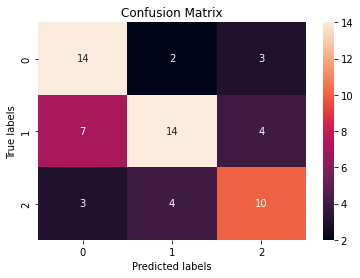

In [44]:
s=sns.heatmap(confusion_matrix(y_test,pred), annot = True)
s.set_title('Confusion Matrix')
s.set_xlabel('Predicted labels', fontsize=10)
s.set_ylabel('True labels', fontsize=10)

In [45]:
report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
report

,1,2,3,accuracy,macro avg,weighted avg
precision,0.583333,0.700000,0.588235,0.622951,0.623856,0.632514
recall,0.736842,0.560000,0.588235,0.622951,0.628359,0.622951
f1-score,0.651163,0.622222,0.588235,0.622951,0.620540,0.621765
support,19.000000,25.000000,17.000000,0.622951,61.000000,61.000000


## Suite3: 80% for training and 20% for testing

In [46]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.2)

#### Support Vector Machine(SVM)

In [47]:
pred=model.predict(x_test)
pred

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 3, 3, 3, 2, 2, 3, 1, 2, 1, 2, 3, 3,
       1, 2, 2, 3, 3, 1, 3, 3, 3], dtype=int64)

In [48]:
y_test

129    2
103    2
134    2
34     1
114    1
92     3
99     2
18     2
148    1
59     2
45     3
2      3
41     3
65     2
97     2
1      3
29     1
55     2
120    1
64     2
8      3
13     3
88     3
14     2
54     2
39     3
93     3
95     2
44     3
43     3
52     3
Name: attribute, dtype: int64

##### Classification accuracy

In [49]:
accuracy_score(y_test,pred)

0.9032258064516129

In [50]:
confusion_matrix(y_test,pred)

array([[ 5,  0,  0],
       [ 1, 12,  0],
       [ 1,  1, 11]], dtype=int64)

Text(33.0, 0.5, 'True labels')

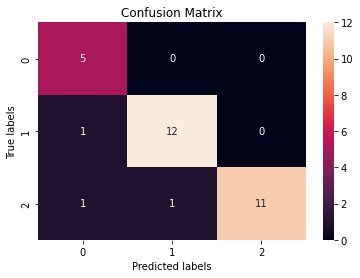

In [51]:
s=sns.heatmap(confusion_matrix(y_test,pred), annot = True)
s.set_title('Confusion Matrix')
s.set_xlabel('Predicted labels', fontsize=10)
s.set_ylabel('True labels', fontsize=10)

In [52]:
report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
report

,1,2,3,accuracy,macro avg,weighted avg
precision,0.714286,0.923077,1.000000,0.903226,0.879121,0.921659
recall,1.000000,0.923077,0.846154,0.903226,0.923077,0.903226
f1-score,0.833333,0.923077,0.916667,0.903226,0.891026,0.905914
support,5.000000,13.000000,13.000000,0.903226,31.000000,31.000000


#### Decision tree

In [53]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
pred=model.predict(x_test)
pred

array([2, 2, 2, 1, 2, 3, 1, 2, 2, 2, 3, 1, 1, 2, 2, 3, 1, 2, 1, 2, 3, 1,
       1, 2, 2, 3, 1, 2, 3, 3, 1], dtype=int64)

In [55]:
y_test

129    2
103    2
134    2
34     1
114    1
92     3
99     2
18     2
148    1
59     2
45     3
2      3
41     3
65     2
97     2
1      3
29     1
55     2
120    1
64     2
8      3
13     3
88     3
14     2
54     2
39     3
93     3
95     2
44     3
43     3
52     3
Name: attribute, dtype: int64

##### Classification accuracy

In [56]:
accuracy_score(y_test,pred)

0.7096774193548387

In [57]:
confusion_matrix(y_test,pred)

array([[ 3,  2,  0],
       [ 1, 12,  0],
       [ 6,  0,  7]], dtype=int64)

Text(33.0, 0.5, 'True labels')

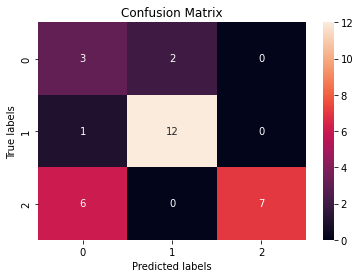

In [58]:
s=sns.heatmap(confusion_matrix(y_test,pred), annot = True)
s.set_title('Confusion Matrix')
s.set_xlabel('Predicted labels', fontsize=10)
s.set_ylabel('True labels', fontsize=10)

In [59]:
report=pd.DataFrame(classification_report(y_test,pred,output_dict=True))
report

,1,2,3,accuracy,macro avg,weighted avg
precision,0.3,0.857143,1.000000,0.709677,0.719048,0.827189
recall,0.6,0.923077,0.538462,0.709677,0.687179,0.709677
f1-score,0.4,0.888889,0.700000,0.709677,0.662963,0.730824
support,5.0,13.000000,13.000000,0.709677,31.000000,31.000000
